### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Simulação de ruído em um chip
Muitas vezes é muito demorado para executar circuitos quânticos em um chip real, ou esses circuitos são muito grandes para serem executados nos chips que temos acesso. Nesses casos, será útil utilizar as funções prontas do qiskit para simular o ruído de um determinado chip.

Usando (https://qiskit.org/documentation/apidoc/aer_noise.html), vamos considerar um exemplo, como segue. 

In [1]:
from qiskit import QuantumCircuit, execute, IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

In [11]:
# contruir modelo de ruido a partir das propriedades do chip
nshots = 8192
provider = IBMQ.load_account()
device = provider.get_backend('ibmq_bogota')
simulator = Aer.get_backend('qasm_simulator')
noise_model = NoiseModel.from_backend(device) # essa funcao constroi o modelo de ruido

ibmqfactory.load_account:WARNING:2022-02-08 09:52:38,669: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['reset', 'cx', 'sx', 'id', 'measure', 'x']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('sx', [0]), ('sx', [1]), ('sx', [2]), ('sx', [3]), ('sx', [4]), ('x', [0]), ('x', [1]), ('x', [2]), ('x', [3]), ('x', [4]), ('cx', [4, 3]), ('cx', [3, 4]), ('cx', [3, 2]), ('cx', [2, 3]), ('cx', [1, 2]), ('cx', [2, 1]), ('cx', [1, 0]), ('cx', [0, 1]), ('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('reset', [4]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


In [9]:
# obter mapa de acoplamento do chip
coupling_map = device.configuration().coupling_map
print(coupling_map)

[[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]


In [14]:
# obter base de portas logicas a partir do modelo de ruido
basis_gates = noise_model.basis_gates
print(basis_gates)

['cx', 'id', 'reset', 'rz', 'sx', 'x']


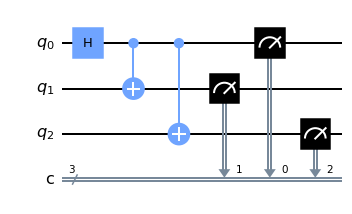

In [15]:
# construir o circuit
qc = QuantumCircuit(3, 3)
qc.h(0); qc.cx(0, 1); qc.cx(0, 2); qc.measure([0, 1, 2], [0, 1, 2])
qc.draw(output = 'mpl')

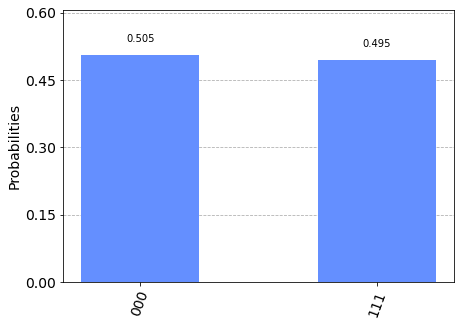

In [17]:
jobS = execute(qc, backend = simulator, shots = nshots)
plot_histogram(jobS.result().get_counts())

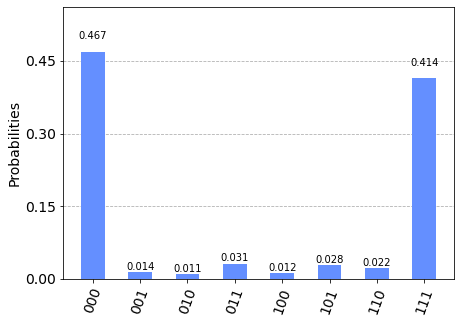

In [20]:
# faz a simulacao com o ruido ja incluido
jobNS = execute(qc, backend = simulator, coupling_map = coupling_map, basis_gates = basis_gates, 
              noise_model = noise_model, shots = nshots)
plot_histogram(jobNS.result().get_counts())

Job Status: job has successfully run


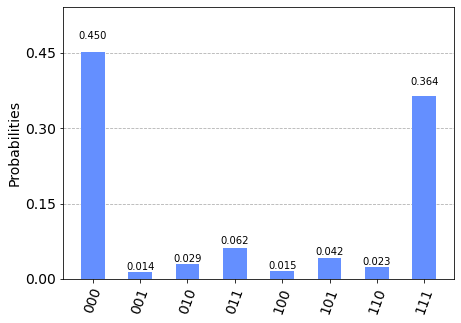

In [9]:
from qiskit.tools.monitor import job_monitor
jobE = execute(qc, backend = device, shots = nshots)
job_monitor(jobE)
plot_histogram(jobE.result().get_counts())

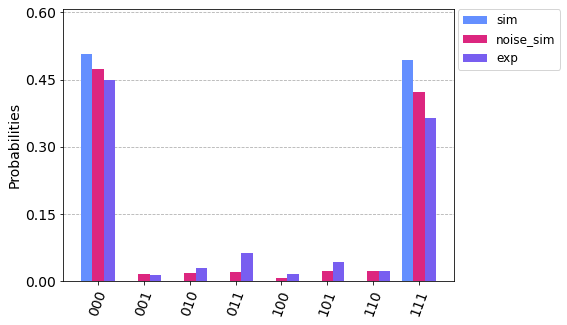

In [15]:
plot_histogram([jobS.result().get_counts(0), jobNS.result().get_counts(0), jobE.result().get_counts(0)], 
               bar_labels = False, legend = ['sim', 'noise_sim', 'exp'])

Como pode ser visto no link acima, é possível incluir algumas especificações no modelo de ruído.


##### Exercício
Escolha outro chip, crie um circuito quântico com 5 qubits, prepare o estado GHZ em três desses qubits e faça um histograma das probabilidades para os estados da base computacional dos 5 qubits incluindo dados de simulação sem ruído, simulação com ruído e dados de execução do circuito quântico no chip real. 